In [3]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [5]:
data=pd.read_csv('AUTOMOBILE_PURCHASE_CLASSIFIER.csv')

In [6]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [10]:
X=data.iloc[:,[1,2,3]].values
Y=data.iloc[:,4].values


In [11]:
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [12]:
# Covnerting the categorical data into numeric data
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
X[:,0]=model.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
std_sclr=StandardScaler()
X_train=std_sclr.fit_transform(X_train)
X_test=std_sclr.fit_transform(X_test)

G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
#Fitting Support Vector Classifier into the Training set
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,Y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
# Predicting the  test data
Y_pred=classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


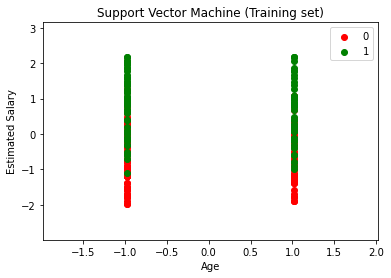

In [25]:
#Visualizing the Trainign set
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.93